In [2]:
from IPython.display import Image #just to display

In [7]:
Image(url="../Assignments/Week5_17.png", width=600, height=600) 

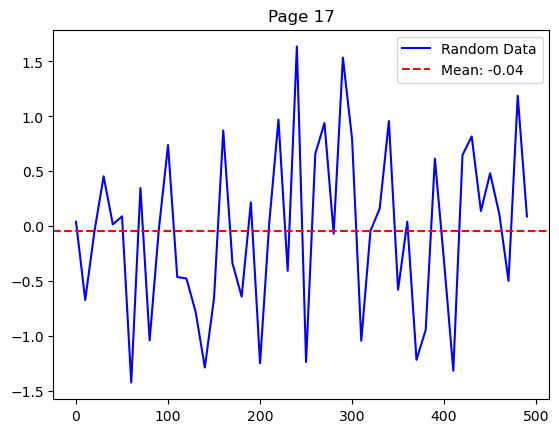

In [38]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
y = np.random.randn(1, N)
y = y.flatten()
start = 0
end = 500
interval = end/N
x = np.arange(start, end, interval)
mean = y.sum()/len(y)

plt.plot(x,y, color = 'blue', label='Random Data')
plt.axhline(mean, color = 'red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.legend()
plt.title('Page 17')

#Add X and Y labels!

plt.show()

In [11]:
Image(url="../Assignments/Week5_25.png", width=600, height=600) 

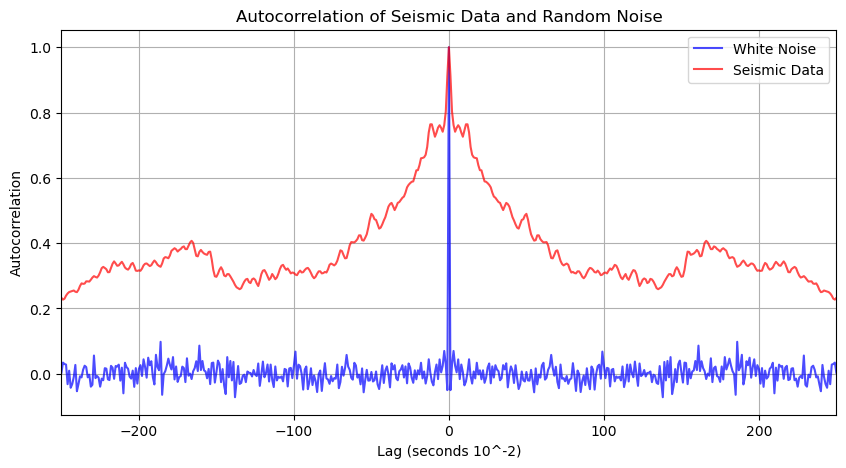

801


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

time_vector = np.linspace(0, 10, 1000)
white_noise = np.random.normal(0, 1, len(time_vector))
white_noise_autocorr = np.correlate(white_noise, white_noise, mode='full')
white_noise_lags = np.arange(-len(white_noise) + 1, len(white_noise))
white_noise_autocorr_normalized = white_noise_autocorr / white_noise_autocorr[len(white_noise) - 1]

st = read("../Data_Sources/II.KAPI.00.BH1.M.2024.268.105837.SAC")
trace = st[0]
trace = trace.trim(starttime=300, endtime=trace.stats.starttime + 310)
seismic_data = trace.data
seismic_autocorr = np.correlate(seismic_data, seismic_data, mode='full')
seismic_lags = np.arange(-len(seismic_data) + 1, len(seismic_data))
seismic_autocorr_normalized = seismic_autocorr / seismic_autocorr[len(seismic_data) - 1]

plt.figure(figsize=(10, 5))
plt.plot(white_noise_lags, white_noise_autocorr_normalized, color='blue', alpha=0.7, label='White Noise')
plt.plot(seismic_lags, seismic_autocorr_normalized, color='red', alpha=0.7, label='Seismic Data')

plt.title('Autocorrelation of Seismic Data and Random Noise')
plt.xlabel('Lag (seconds 10^-2)')
plt.ylabel('Autocorrelation')
plt.xlim([-250, 250])
plt.legend()
plt.grid()
plt.show()

print(len(seismic_autocorr))
